#数据定制
Data Booking


###步骤二：清洗
Step2: Cleanning

对于一份有价值的数据，我们首先要清洗它，剔除错误的数据条，规避干扰信息，这样才能使后续的分析工作顺利展开。

For one valuable data, the first step is to make it clean, such like take out the error recordings, escape from the nosing information, then we are prepared well for the process of data analysing.

In [1]:
import pandas as pd # 导入 pandas 数据分析库

df = pd.read_csv('/Users/chengang/Desktop/merged_data.csv',error_bad_lines=False,low_memory=False)# 导入 csv 数据，忽略错误行
#df.to_csv("/Users/chengang/Desktop/merged_data1.csv")# 保存清洗后的数据到 csv 文件

以上是一个最基本的清洗过程：首先导入数据并剔除错误条目，在本案例中，主要就是剔除列数错误的数据条，然后将清洗好的数据重新导入一个CSV文本。

Above is a basic process of data cleanning: reading the data and take out the error line, in this case, mostly job is to take out the error rows with wrong column numbers, then port the clean data into a new CSV file.

###步骤三：分析
Step3: Analysing

干净的数据就位之后，接下来就是准备数据分析环境了。

So clean data is ready, the next step is to prepare environment of data analysing.

In [19]:
# coding=utf8
%matplotlib inline
from matplotlib import pyplot as plt

import sys  
reload(sys)  
sys.setdefaultencoding('utf-8')#设定默认编码适应中文  

import matplotlib
matplotlib.rcParams['savefig.dpi']=110#设定图片分辨率

from matplotlib import font_manager # 导入字体管理器
cfont = font_manager.FontProperties(fname='/Library/Fonts/华文黑体.ttf')#设定中文字体
cfont2 = font_manager.FontProperties(fname='/Library/Fonts/华文细黑.ttf')
#以上为通用导入设定


本案例的数据分析环境，主要是 pandas 数据分析库, 同时依赖 numpy, matplotlib, ipython 三个第三方库。

1. Pandas 是主要数据分析模块；
2. Numpy 是数学计算的模块；
3. Matplotlib 是数学图像化输出的模块；
4. Ipython 的 notebook 模式负责输入输入的整合显示。

The major environment of this case is pandas, based on numpy, matplotlib and ipython the 3 third-library.

- Pandas is the major module for data analyse;
- Numpy is a classic methmetic module;
- Matplotlib is a matlab-like methmetic visulization library for make 2D plot of arrays;
- Ipython notebook is a tool taking care for the integrated printing of all I/Os.

值得一提的是，Ipython notebook 可以将程序的输入 (In) 和程序的输出 (Out) 视为一个单元 Cell, 用户与 Python 的交互过程可以动态、顺序的显示在浏览器中；对于图像，用 __%matplotlib inline__ 语句将程序调用 matplotlib 所生成的视图也内嵌在浏览器(Out)输出的页面中。另外 Ipython notebook 的 .ipynb 格式文件直接以 json、base64 编码保存所有输入输出为一个单独的文件，而这一文件格式在 Github 也得到了[支持](http://blog.jupyter.org/2015/05/07/rendering-notebooks-on-github/)，也可以[加速渲染](http://nbviewer.jupyter.org/)。

It worth to mention that Ipython notebook could print all the I/O in one cell, all the interactions between user and python can be printed on the browsers in order; for pictures, use __%matplotlib inline__ can emded the calling of matplotlib's feed backing picture into browser. Further more, Ipython notebook's file tpye .ipynb can save all the results on the browser into on single file in json and base64 encoded, and this kind of file type can be supported on [Github](http://blog.jupyter.org/2015/05/07/rendering-notebooks-on-github/), also can be rendered [fastly](http://nbviewer.jupyter.org/).

下面是一些数据分析的基本操作。

Here are some basic operations for data analysing.

In [3]:
#print df.head() #查看文件标头
#df.tail()       #查看文件末尾
#df.describe()   #查看文件描述
#df.index        #查看数据索引
#df.values       #查看数据值
#df.iloc[:,-2]                                #定位到所有行的倒数第2列
#df.iloc[:,-2].value_counts()                 #统计此列所有值
#df.iloc[:,-2].value_counts().plot()          #图形化显示
#df.iloc[:,-2].value_counts().plot(kind='bar')#设定图形形状柱形图
#df.iloc[:,-2].value_counts().plot(kind='bar').get_figure().savefig('/Users/chengang/Desktop/tt.pdf')#保存图片
#df.iloc[:,-2].value_counts().hist()          #直方图

我们搜集的是案列网站2006年3月至2015年5月100万的随机任务记录，占该网站总任务量600万的六分之一，因此我们认为这是一个具有代表性的数据源。
鉴于这是一个任务悬赏式的网站，雇主首先贴出要求，竞标者出方案接标。因此我们首先关注一下这100万交易的成功比例。

（注：100万任务中，有近一半在案例网站无内容记录，因此有效数据为50万）

In [4]:
successPercent = df.iloc[:,2].value_counts().iloc[0:2]
pd.DataFrame(successPercent,columns=['Count_数量'])

,Count_数量
未成交,432244
已成交,112838


以上代码统计了数据中已成交和未成交项目的数量，分别为112838和432244，这是两个抽象的数字，数字的分析可以止步于此。然而在大数据的时代，关键的一步是让数据直观起来，将复杂的信息浓缩简化成我们的大脑可以立刻掌握的形式，这就是数据视图化(Data visualisation)的魅力所在，那么让我们直观地体验一下数据视图化的表现力。

###步骤四：视图化
按照上述统计结果生成饼状图的代码如下：

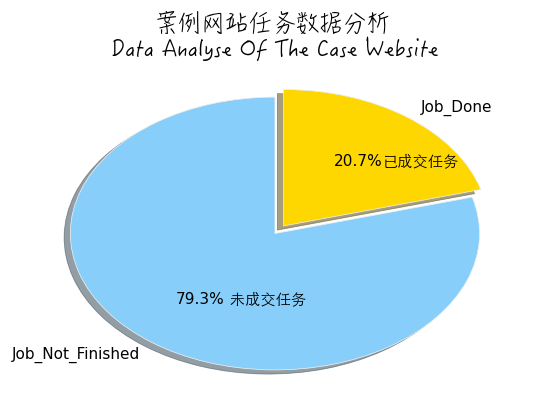

In [5]:
plt.style.use('ggplot')# use ggplot style
zhfont1= font_manager.FontProperties(fname='/Library/Fonts/Lantinghei.ttc')#设定中文字体
zhfont2= font_manager.FontProperties(fname='/Library/Fonts/Hanzipen.ttc')
zhfont3= font_manager.FontProperties(fname='/Library/Fonts/Yuanti.ttc')

figpie = plt.figure()
figpie.suptitle(u'案例网站任务数据分析',x=0.51,y=1.02,fontproperties=zhfont2,size=15)#title for figure

axpie = figpie.add_subplot(111)
axpie.set_title(u'Data Analyse Of The Case Website',size=15,fontproperties=zhfont2)#直接指定字体
axpie.text(0.54,0.50,u"已成交任务",fontproperties='STHeiti',size=10) #设定图片内显示文本
axpie.text(-0.24,-0.51,u" 未成交任务",fontproperties='STHeiti',size=10) 
#'yellowgreen', 'gold', 'lightskyblue', 'lightcoral'#可用的饼图颜色
pie = df.iloc[:,2].value_counts().iloc[0:2].plot(kind='pie',labels= [u'Job_Not_Finished',u'Job_Done'],explode= (0, 0.07,),colors=['lightskyblue', 'gold'],shadow=True,autopct='%0.1f%%', startangle=90);#设定图形形状柱形图
axpie.set_ylabel(u'',fontproperties=zhfont2,size=12)#覆盖默认纵轴名称None

pie

可以看到图中黄色部分代表已成交的任务，占总任务的 1/5 左右。也就是说，有百分之八十的任务是不了了之了。  

我们很好奇这成交的任务中，到底有多少钱被投标者赚到，因此让我们统计一下这已成交任务中，排名前20的交易额。

In [6]:
tradeOrder = df.iloc[:,3].value_counts().iloc[2:22]
pd.DataFrame(tradeOrder, columns = ['Count_数量'])

,Count_数量
￥100.00,12477
￥300.00,6003
￥200.00,5932
￥500.00,5424
￥400.00,5301
￥1.00,5229
￥10.00,4510
￥50.00,4439
￥99.00,3486
￥1000.00,3016


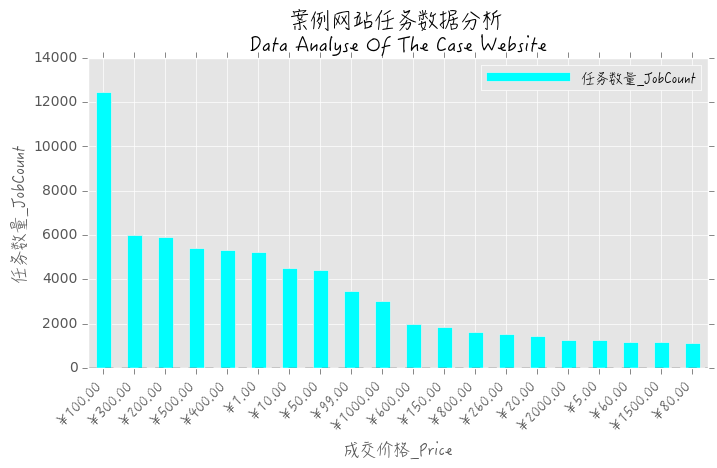

In [7]:
#pd.options.display.mpl_style = 'default'
plt.style.use('ggplot')# use ggplot style
matplotlib.rcParams['savefig.dpi']=100#设定图片的DPI

fig = plt.figure(figsize=plt.figaspect(0.5)) #定义一个图片，设定宽高比例
fig.suptitle(u'案例网站任务数据分析',x=0.51,y=1.02,fontproperties=zhfont2,size=15)#title for figure
ax = fig.add_subplot(111) #划分1行1列选第1块坐标体系。  
x = ax.xaxis #获取 x 轴坐标
y = ax.yaxis 
xmajorLocator = matplotlib.ticker.MultipleLocator(1)#设定主 X 轴间隔为1的倍数
x.set_major_locator(xmajorLocator)#加载定位器

df.iloc[:,3].value_counts().iloc[2:22].plot(kind = 'bar',color=(0,1,1),position=0.5,label=u'任务数量_JobCount')#图形化显示，选定RGB颜色，选定标记为点,
ax.set_title(u'Data Analyse Of The Case Website',fontproperties=zhfont2,size=15)#设定图片标头及其属性
ax.set_xlabel(u'成交价格_Price',fontproperties=zhfont2,size=12)#设定横轴名称
ax.set_ylabel(u'任务数量_JobCount',fontproperties=zhfont2,size=12)#设定纵轴名称
ax.legend(handlelength=6,loc='upper right',prop=zhfont2)#设定图素标
#ax.bar(df.iloc[:,3].value_counts().iloc[2:22])
# 设定 x 轴标签
ax.set_xticklabels(df.iloc[:,3].value_counts().iloc[2:22].index,
                   fontproperties=zhfont2,
                   rotation=45,
                   horizontalalignment='right' )#设定 X 轴坐标标签45度倾斜并右对齐。

fig.show()


可以看到成交价格为100元的任务数量达到了12000个左右，占第一名，之后就是300元与200元的各6000个左右。 也就是说，前三甲的成交价格都不超过300元。

再来看看到底有哪些任务是比较多的。

In [8]:
dutyNumber = df.iloc[:,9].value_counts().iloc[1:22]
dno = pd.DataFrame(dutyNumber, columns=['Count_数量'])
dno

,Count_数量
LOGO设计,59228
网站制作,18671
推广注册,18084
论坛推广,15973
网络营销推广,13908
淘宝店铺推广,13495
桌面软件,10605
需求市场,10513
网页设计,10423
QQ群推广,9850


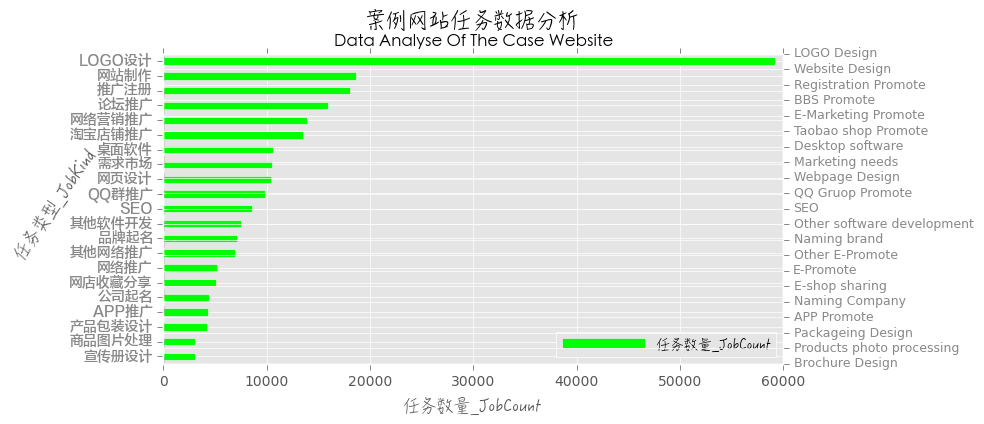

In [91]:
#pd.options.display.mpl_style = 'default'
plt.style.use('ggplot')# use ggplot style
matplotlib.rcParams['savefig.dpi']=100
fig = plt.figure(figsize=plt.figaspect(0.50))#定义一个图片
fig.suptitle(u'案例网站任务数据分析',x=0.51,y=1.01,fontproperties=zhfont2,size=15)#title for figure

ax = fig.add_subplot(111)#划分1行1列选第1块坐标系统。
y = ax.yaxis #获取ax坐标系 y 轴
ymajorLocator = matplotlib.ticker.MultipleLocator(1)#设定主 y 轴间隔为1的倍数
y.set_major_locator(ymajorLocator)
ax.set_yticklabels('abcdefg',fontproperties=zhfont1,alpha=0.7)#设定 y 轴坐标标签
ax.set_title(u'Data Analyse Of The Case Website',fontproperties='STHeiti',size=12)#设定axes图片标头及其属性#title for axex
ax.set_xlabel(u'任务数量_JobCount',fontproperties=zhfont2,size=12)#设定横轴名称
ax.set_ylabel(u'任务类型_JobKind',fontproperties=zhfont2,size=12,rotation=55,)#设定纵轴名称
#order重新排列, barh 水平柱状图图形化显示，选定RGB颜色，选定标记为点
dutyPic = df.iloc[:,9].value_counts().iloc[1:22].order(ascending=True).plot(kind = 'barh',color=(0,1,0),label=u'任务数量_JobCount')

ax.legend(handlelength=6,loc='lower right',prop=zhfont2)#设定图素标

# Add a twins y axis for English labels.
ax2 = ax.twinx() # creat a new axes(ax2) shares the x-axis with ax.
y2 = ax2.yaxis#获取 y 轴坐标
y2majorLocator = matplotlib.ticker.LinearLocator(21)
#y2majorLocator = matplotlib.ticker.MultipleLocator(0.05)
y2.set_major_locator(y2majorLocator)#加载定位器
labels=['LOGO Design',
       'Website Design',
       'Registration Promote',
       'BBS Promote',
       'E-Marketing Promote',
       'Taobao shop Promote',
       'Desktop software',
       'Marketing needs',
       'Webpage Design',
       'QQ Gruop Promote',
       'SEO',
       'Other software development',
       'Naming brand',
       'Other E-Promote',
       'E-Promote',
       'E-shop sharing',
       'Naming Company',
       'APP Promote',
       'Packageing Design',
       'Product''s photo processing',
       'Brochure Design']
labels=list(reversed(labels))
ax2.set_yticklabels(labels,size=9,alpha=0.7) # setting axx2.y tick labels

dutyPic

可以看到，Logo 设计达到了60000左右，名列第一；  
第二名的是网站制作，达到了18000左右的数量；  
第三第四第五第六可以统括为推广类的任务，总共6万左右。  

我们想知道，这些发布任务的雇主，都是来自什么地方，首先统计一下雇主区域分布，代码如下：

In [10]:
areaOrder = df.iloc[:,-2].value_counts().iloc[1:20]#统计各区域任务数量排名前20
aoc = pd.DataFrame(areaOrder,columns=['Count_数量'])
aoc

,Count_数量
浙江,796
广东,786
深圳,472
广州,374
长沙,294
上海,217
北京,212
杭州,199
烟台,189
武汉,187


看视图：

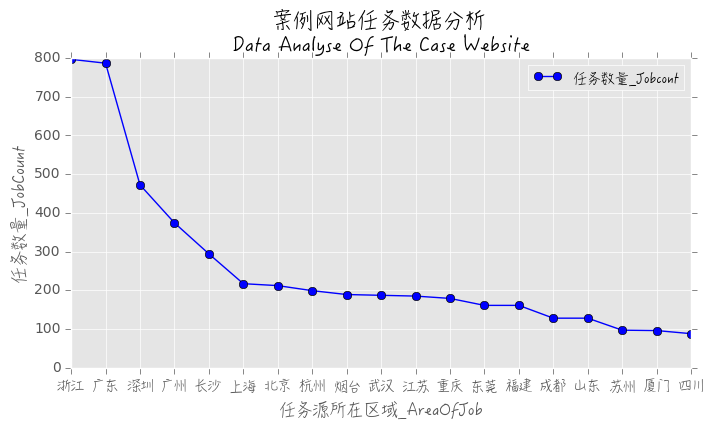

In [11]:
matplotlib.rcParams['savefig.dpi']=100#设定图片的DPI
plt.style.use('ggplot')# use ggplot style
fig = plt.figure(figsize=plt.figaspect(0.5))#定义一个图片
fig.suptitle(u'案例网站任务数据分析',x=0.51,y=1.02,fontproperties=zhfont2,size=15)#title for figure

ax = fig.add_subplot(111)#划分1行1列选第1块。  
x = ax.xaxis#获取 x 轴坐标
y = ax.yaxis#获取 y 轴坐标
xmajorLocator = matplotlib.ticker.MultipleLocator(1)#设定主 X 轴间隔为1的倍数
x.set_major_locator(xmajorLocator)#加载定位器
ax.set_xticklabels('abcdefg',fontproperties=zhfont2)#设定 X 轴坐标标签

aop = df.iloc[:,-2].value_counts().iloc[1:20].plot(color=(0,0,1),marker='o')#图形化显示，选定RGB颜色，选定标记为点
plt.title(u'Data Analyse Of The Case Website',fontproperties=zhfont2,size=15)#设定图片标头及其属性
plt.xlabel(u'任务源所在区域_AreaOfJob',fontproperties=zhfont2,size=12)#设定横轴名称
plt.ylabel(u'任务数量_JobCount',fontproperties=zhfont2,size=12)#设定纵轴名称
plt.legend((u'任务数量_Jobcont',), loc='upper right',prop=zhfont2)#设定图素标
aop



浙江，广东，深圳成为了前三甲，由此可见雇主以南方省份居多。那么我们还想进一步探究到底是哪些城市发布需求较为频繁，代码如下：

In [12]:
cityOrder = df.iloc[:,-1].value_counts().iloc[1:20]#统计各城市任务数量排名前20
coc = pd.DataFrame(cityOrder,columns=['Count_数量'])
coc

,Count_数量
温州,545
深圳,209
广州,173
东莞,95
杭州,85
成都,59
武汉,57
厦门,55
南京,51
苏州,51


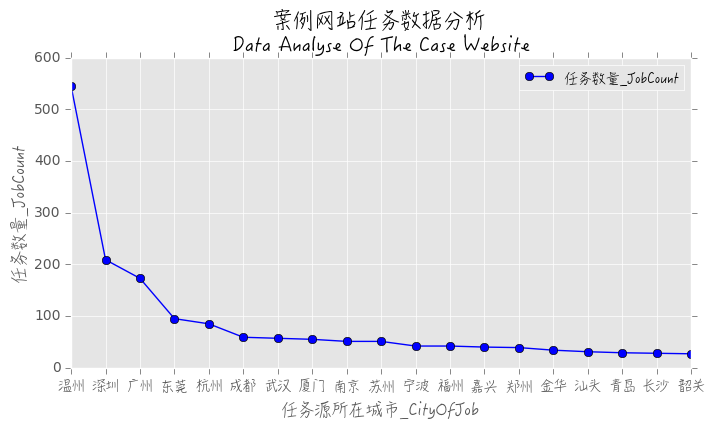

In [13]:
matplotlib.rcParams['savefig.dpi']=100
plt.style.use('ggplot')# use ggplot style

fig = plt.figure(figsize=plt.figaspect(0.5))#定义一个图片
fig.suptitle(u'案例网站任务数据分析',x=0.51,y=1.02,fontproperties=zhfont2,size=15)#title for figure

ax = fig.add_subplot(111)#划分1行1列选第1块。  
x = ax.xaxis; xmajorLocator = matplotlib.ticker.MultipleLocator(1) #获取x,y轴坐标 #设定主 X 轴间隔为1的倍数
x.set_major_locator(xmajorLocator)#加载 x 轴定位器
ax.set_xticklabels('abcdefg',fontproperties=zhfont2)#设定 X 轴坐标标签字体

cop = df.iloc[:,-1].value_counts().iloc[1:20].plot(color=(0,0,1),marker='o')#图形化显示，选定RGB颜色，选定标记为点
plt.title(u'Data Analyse Of The Case Website',fontproperties=zhfont2,size=15)
plt.xlabel(u'任务源所在城市_CityOfJob',fontproperties=zhfont2,size=12)
plt.ylabel(u'任务数量_JobCount',fontproperties=zhfont2,size=12)
plt.legend((u'任务数量_JobCount',), loc='upper right',prop=zhfont2)
cop

温州，这个来自浙江的城市，以545个任务超过第二名深圳两倍的数量名列第一。

###步骤五：数据具象化跟场景化
当我们可以清晰准确的分析数据并得出一目了然的图表之后，更进一步的工作有两个，第一：数据指标具象化。第二：视图场景化。在本案例中，我们按照城市任务数目的大小来具象化城市为一个圆形面积，代表这个城市的任务数量；再将各个城市安置在宏观的地图之上，让人立体的感知这份数据所表达的各个城市不同的任务数目。

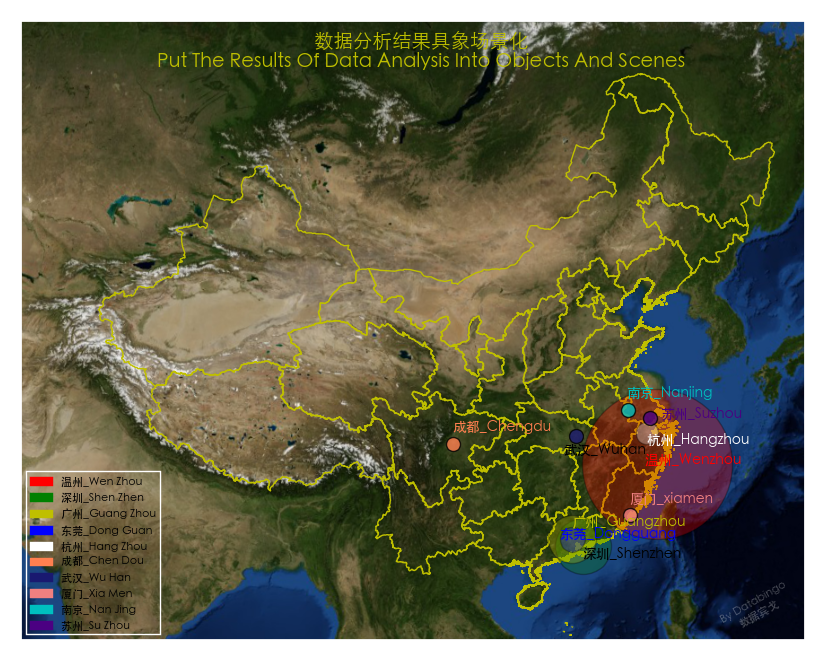

In [61]:
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['savefig.dpi']=200



fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_title(u'数据分析结果具象场景化 \nPut The Results Of Data Analysis Into Objects And Scenes',x=0.51,y=0.9,fontproperties=cfont2,size=7,color='y')

# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,llcrnrlon=70,llcrnrlat=15,urcrnrlon=140,urcrnrlat=55,lat_0=15,lon_0=95)

#Download shapefile from http://gadm.org/
m.readshapefile('/Users/chengang/快盘/MacApp/CHN_adm-ChinaShapefile/CHN_adm1','china',color='y')

#Wen Zhou
lat1,lon1 = 27.9948359205,120.6993872251 
x1,y1 = m(lon1,lat1)#Convert into map coords
m.plot(x1,y1,'ro',markersize=545/10,alpha=.3)
ax.text(x1-100000,y1,u'温州_Wenzhou',fontproperties=cfont,fontsize=5,color='r')

#Shen Zhen
lat2,lon2 = 22.5428388201,114.0595442860  
x2,y2 = m(lon2,lat2)#Convert into map coords
m.plot(x2,y2,'go',markersize=209/10,alpha=.3)
ax.text(x2,y2-100000,u'深圳_Shenzhen',fontproperties=cfont,fontsize=5,color='black')


#Guang Zhou
lat3,lon3 = 23.1290659730,113.2643500268  
x3,y3 = m(lon3,lat3)#Convert into map coords
m.plot(x3,y3,'yo',markersize=173/10,alpha=.3)
ax.text(x3,y3+100000,u'广州_Guangzhou',fontproperties=cfont,fontsize=5,color='y')

#Dong Guang
lat4,lon4 = 23.1290659730,113.2643500268  
x4,y4 = m(lon4,lat4)#Convert into map coords
m.plot(x4,y4,'bo',markersize=95/10,alpha=.3)
ax.text(x4-100000,y4,u'东莞_Dongguang',fontproperties=cfont,fontsize=5,color='b')

'''
lat,lon = 23.1290659730,113.2643500268  
x,y = m(lon,lat)#Convert into map coords
m.plot(x,y,color='',marker='o',markersize=95/10,alpha=.3)
plt.text(x,y,u'',fontproperties=cfont,fontsize=5,color='')
'''
#Hang Zhou
lat5,lon5 = 30.2741483696,120.1551536571  
x5,y5 = m(lon5,lat5)#Convert into map coords
m.plot(x5,y5,color='w',marker='o',markersize=85/10,alpha=.3)
ax.text(x5,y5-100000,u'杭州_Hangzhou',fontproperties=cfont,fontsize=5,color='w')

#Chen Dou
lat6,lon6 = 30.5701629507,104.0647659946
x6,y6 = m(lon6,lat6)#Convert into map coords
m.plot(x6,y6,color='coral',marker='o',markersize=59/10,alpha=.8)
ax.text(x6,y6+100000,u'成都_Chengdu',fontproperties=cfont,fontsize=5,color='coral')

#Wu Han
lat7,lon7 = 30.5927473203,114.3052306105
x7,y7 = m(lon7,lat7)#Convert into map coords
m.plot(x7,y7,color='midnightblue',marker='o',markersize=57/10,alpha=.8)
ax.text(x7-100000,y7-150000,u'武汉_Wuhan',fontproperties=cfont,fontsize=5,color='k')

#Xia Men
lat8,lon8 = 24.4795594847,118.0894498097
x8,y8 = m(lon8,lat8)#Convert into map coords
m.plot(x8,y8,color='lightcoral',marker='o',markersize=55/10,alpha=.8)
ax.text(x8,y8+100000,u'厦门_xiamen',fontproperties=cfont,fontsize=5,color='lightcoral')

#Nan Jing
lat9,lon9 = 32.0583898428,118.7964667635
x9,y9 = m(lon9,lat9)#Convert into map coords
m.plot(x9,y9,color='c',marker='o',markersize=51/10,alpha=.8)
ax.text(x9,y9+100000,u'南京_Nanjing',fontproperties=cfont,fontsize=5,color='c')

#Su Zhou
lat10,lon10 = 31.2983274306,120.5831901464  
x10,y10 = m(lon10,lat10)#Convert into map coords
m.plot(x10,y10,color='indigo',marker='o',markersize=51/10,alpha=.8)
ax.text(x10+100000,y10,u'苏州_Suzhou',fontproperties=cfont,fontsize=5,color='indigo')

WenZhou = matplotlib.patches.Patch(color='r', label= u'温州_Wen Zhou')
ShenZhen = matplotlib.patches.Patch(color='g', label='深圳_Shen Zhen')
GuangZhou = matplotlib.patches.Patch(color='y', label='广州_Guang Zhou')
DongGuang= matplotlib.patches.Patch(color='b', label='东莞_Dong Guan')
HangZhou= matplotlib.patches.Patch(color='w', label='杭州_Hang Zhou')
ChenDou= matplotlib.patches.Patch(color='coral', label='成都_Chen Dou')
WuHan= matplotlib.patches.Patch(color='midnightblue', label='武汉_Wu Han')
XiaMen= matplotlib.patches.Patch(color='lightcoral', label='厦门_Xia Men')
NanJing= matplotlib.patches.Patch(color='c', label='南京_Nan Jing')
SuZhou= matplotlib.patches.Patch(color='indigo', label='苏州_Su Zhou')
#以上创建 Patch 对象作为图例

ax.legend(handles=[WenZhou,ShenZhen,GuangZhou,DongGuang,HangZhou,ChenDou,WuHan,XiaMen,NanJing,SuZhou],
           loc=3,prop={'fname':'/Library/Fonts/华文黑体.ttf','size':4})#have to use prop and address to set chinese font
#以上添加图例


latw,lonw = 16.5428388201,127.0595442860  
xw,yw = m(lonw,latw)#Convert into map coords
ax.text(xw,yw,u'By Databingo \n数据宾戈',horizontalalignment='center',verticalalignment='center',
       fontproperties=cfont, alpha=0.3,rotation=30,color='w',fontsize=4)#签名


m.bluemarble()
fig.show()

In [ ]:
firstRecord = df.loc[0]
frinfo = pd.DataFrame(firstRecord,columns=['DutyDetails_任务细节'])
frinfo

###总结
因为收集时保存 CSV 文件选择的分隔符是','逗号，而数据正文中有时刚好有逗号出现，因此偶尔会打乱原有的列数，造成部分数据条键与值错位，如上图所示，时间被保存到文本数据格中。避免这种情况的办法就是在收集数据时，将 CSV 分隔符设置为不常用的单个字符，如符号'`'，符号'*'，符号'|'等。
示例代码：

In [ ]:
import csv
with open('test.csv','wb') as csvfile:
    writer = csv.writer(csvfile, dialect='excel', delimiter='`')
    writer.writerow('t')

##-End-_-完-